# PRACTICA 8. BLOCKCHAIN

### Objetivos:
* Declaración de objetos _block_ que se asemejan a los bloques de una red blockchain.
* Creación de una blockchain de objetos _block_.
* Desplegar  una  red  Blockchain  real  que  permita  registrar  y  minar  transacciones
* Ampliar la red añadiendo nuevos nodos 

### 1.1: Definición del objeto Bloque(_block_).

La clase desarrollada se encuentra en el archivo **block.py**

In [1]:
from block import Block

# Se crea una instancia bloque
block = Block(0,[],10.0,"")
# Se calcula el hash del mismo
hash = block.compute_hash()
print(f"El hash del bloque creado es: {hash}\n")

# Creamos otra instancia bloque (con el index distinto) 
block2 = Block(1,[],10.0,"")
hash2 = block2.compute_hash()
# Comprobamos que los hashed de ambos bloques son muy distintos
print(f"Son los hashs iguales? {hash == hash2}")
print(f"Bloque1: {hash}")
print(f"Bloque2: {hash2}")

El hash del bloque creado es: ff4ab806038c85473a76cc1f9e7949f098ba5599a6196cf28b7216a087780903

Son los hashs iguales? False
Bloque1: ff4ab806038c85473a76cc1f9e7949f098ba5599a6196cf28b7216a087780903
Bloque2: 189ac93a681b2d2982d5a89500585757a77590d319eddf141275853614b4d1b9


### 1.2: Definición del objeto blockchain(_Blockchain_)  
La clase desarrollada se encuentra en el archivo **blockchain.py**

In [7]:
from blockchain import Blockchain

# Se crea una instancia de Blockchain
blockchain = Blockchain()
# Probamos a mostrar el último bloque de la blockchain
blockchain.create_genesisBlock()
genesis = blockchain.last_block
print(f"El último bloque de la blockchain, es en este caso, el de genesis: \n{genesis.__dict__}")

El último bloque de la cadena, es en este caso, el de genesis: 
{'index': 0, 'transactions': [], 'timestamp': 1652289154.6945038, 'previous_hash': '0', 'nonce': 0, 'current_hash': '45e1699586bdcaa8f9f4b90c78e1418041d3bc87baf72280cab318fd0dc6f4aa'}


### 1.3: Definición del Proof‐Of‐Work
Se ha añadido la dificultad de encontrar un hash _válido_. Un hash es _válido_ si comienza por el número de ceros correspondiente a la dificultad establecida en la _Blockchain_.

blockchain de dificultad 3:

Blockchain dificultad 1:
----------------------------------------------------
El hash válido del bloque: 010b448fd70279cd4971e519b4c8f9e7ad6c0af000304fd730c8f7ade0aee24a

El valor de nonce necesario: 6
El tiempo transcurrido: 0.0 (s)
----------------------------------------------------

Blockchain dificultad 3:
----------------------------------------------------
El hash válido del bloque: 0003ea83b263a6c399d168677b2f0ceae3b62dd0f1dabe2e09f4cdbaab170964

El valor de nonce necesario: 4236
El tiempo transcurrido: 0.028342247009277344 (s)
----------------------------------------------------

Blockchain dificultad 5:
----------------------------------------------------
El hash válido del bloque: 00000f8c8f60e3e80b028c8316012a21a6125d7f54524544fba07c17565555da

El valor de nonce necesario: 1087167
El tiempo transcurrido: 8.027408361434937 (s)
----------------------------------------------------



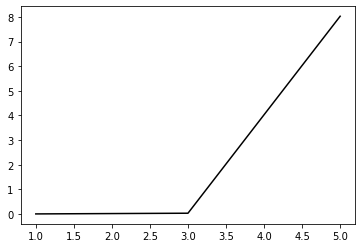

In [27]:
from block import Block
from blockchain import Blockchain
from time import time

# Se crea una blockchain con difficultad 3
blockchain1 = Blockchain(difficulty=1)

# Generamos el bloque de genesis para la blockchain
blockchain1.create_genesisBlock()

# Creamos un nuevo bloque para la blockchain
block1 = Block(blockchain1.last_block.index,[],time(),blockchain1.last_block.current_hash)

# BLOCKCHAIN 1
print(f"Blockchain dificultad {blockchain1.difficulty}:")
print("----------------------------------------------------")
start = time()
# Se pone a trabajar para encontrar un hash valido para el bloque
blockchain1.proof_of_work(block1)
end = time()
time1 = end - start # Tiempo transcurrido
print(f"El hash válido del bloque: {block1.compute_hash()}\n")
print(f"El valor de nonce necesario: {block1.nonce}")
print(f"El tiempo transcurrido: {time1} (s)")
print("----------------------------------------------------\n")

Para probar el correcto funcionamiento de esta nueva implementación, realizamos un experimento con varias cadenas de distinta dificultad:

In [42]:

# Se crean nuevas blockchain
blockchains = []
difficulties = range(0,6)
for i in difficulties:
    blockchains.append(Blockchain(difficulty=i)) # difficultad variable

# Generamos el bloque de genesis para cada blockchain
for blockchain in blockchains:
    blockchain.create_genesisBlock()

times = [] # Para los tiempos de ejecucion
for blockchain in blockchains:
    # Creamos un nuevo bloque para cada blockchain
    block = Block(blockchain.last_block.index,[],time(),blockchain.last_block.current_hash)
    print(f"Blockchain dificultad {blockchain.difficulty}:")
    print("----------------------------------------------------")
    start = time()
    # Se pone a trabajar para encontrar un hash valido para el bloque
    blockchain.proof_of_work(block)
    end = time()
    time_elapsed = end - start
    times.append(time_elapsed) # Tiempo transcurrido
    print(f"El hash válido del bloque: {block.compute_hash()}")
    print(f"El valor de nonce necesario: {block.nonce}")
    print("----------------------------------------------------")

Blockchain dificultad 0:
----------------------------------------------------
El hash válido del bloque: 4884c5baa4c06958f6f3c219ad0dd74837e8578749b027dfeaa0352e68db2ea7
El valor de nonce necesario: 0
----------------------------------------------------
Blockchain dificultad 1:
----------------------------------------------------
El hash válido del bloque: 0ee15d043adfd903d830efab6aa769e54a4cc305b417413f6bd84f1e4c7928cb
El valor de nonce necesario: 2
----------------------------------------------------
Blockchain dificultad 2:
----------------------------------------------------
El hash válido del bloque: 00975db5347dd93f447d606096afa24b4cdd777c6d533af14b8933a5a8c091f6
El valor de nonce necesario: 341
----------------------------------------------------
Blockchain dificultad 3:
----------------------------------------------------
El hash válido del bloque: 000eca02fe10316671da2cc4cfc8fd3cfda817d9b48f75397f6421895c9f29a6
El valor de nonce necesario: 1542
--------------------------------

Representamos en una gráfica los tiempos de trabajo obtenidos para las distintas blockchain. Como era de esperar, se puede deducir que a mayor dificultad mayor tiempo de ejecución.

Text(0, 0.5, 'Tiempo (s)')

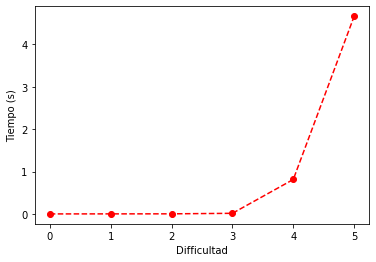

In [47]:
import matplotlib.pyplot as plt

# Se muestra en una gráfica los tiempos de procesado
plt.plot(difficulties,times,"ro--")
plt.xlabel("Difficultad")
plt.ylabel("Tiempo (s)")